# Perceptron algorithm (exercise)

In this exercise, implement a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, you will only use two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor).

In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [5]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Function that plots data and linear classifier

def plot_border(w1, b, data):
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # separation line
    x = np.linspace(0, 10, 100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()  

In [7]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
training_data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]



In [8]:
# write a prediction function that, when the output z is 0 prints "Iris-setosa" and when z = 1 prints "Iris-versicolor".
# Z is the combination of w1, w2 and the bias that make the perceptron. 
def guess_flower(SepalLength, SepalWidth) :
    z = w1 * SepalLength + w2 * SepalWidth + b
    if z >= 0:
        print('Iris-versicolor')
    else:
        print('Iris-setosa')

SyntaxError: unexpected EOF while parsing (<ipython-input-8-e8a354b2126e>, line 4)

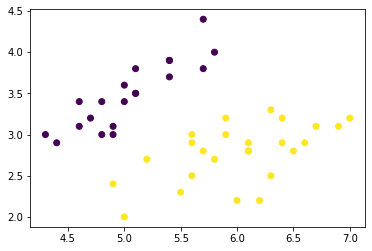

In [12]:
### visualize training data in 2D ###

# x-axis: sepal length, y-axis: sepl width
# use 2 colors to visualize 2 different classes of data 
df = pd.DataFrame(training_data)
sepal_length = df[0]
sepal_width = df[1]
target = df[2]
plt.scatter(sepal_length, sepal_width, c=target)

In [4]:
### training loop ###

# pick a learning rate
lr = 0.1
# initialize weights randomly and set bias to zero
w1, w2 = np.random.rand(2)
b = 0
# write a loop of arbitrary n iterations
for i in range(10):
    # if a point is 0 and is missclassified as 1:
        #update the weights accordingly
        
    # if a point is 1 and is missclassified as 0:
        #update the weights accordingly 

# plot the final result

# BONUS: plot the result after each iteration

In [ ]:
### evaluation ###

# perform prediction on the test dataset



In [ ]:
### plot the evaluation result ###


### Can the accuracy be improved given the limitations (lineal function) of the perceptron algorithm?

Type your answer here:

In [ ]:
# BONUS: Create a confusion matrix with the type of classification errors